<a href="https://colab.research.google.com/github/AluizioW/nivel-rio---arima-rf/blob/main/arima_comdec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/comdec data.csv', index_col='data', parse_dates=True)

#df.index.freq= 'MS'

In [3]:
df.head()

,nivel cm
data,
2005-01-01,313
2005-01-02,315
2005-01-03,317
2005-01-04,323
2005-01-05,325


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6939 entries, 2005-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   nivel cm  6939 non-null   int64
dtypes: int64(1)
memory usage: 108.4 KB


# Descriptive statistics

<Axes: xlabel='data'>

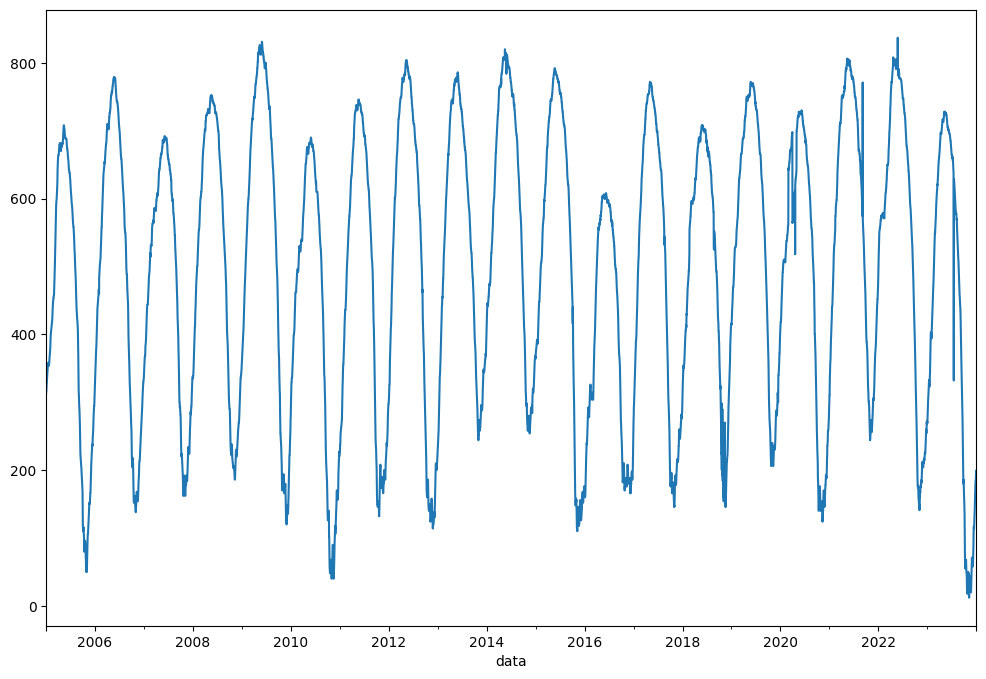

In [5]:
df['nivel cm'].plot(figsize=(12,8))

In [6]:
df['nivel cm'].describe()

,nivel cm
count,6939.000000
mean,501.631359
std,212.074803
min,12.000000
25%,312.500000
50%,550.000000
75%,686.000000
max,837.000000


In [7]:
df['nivel cm'].skew()

-0.3959601780803911

In [8]:
df['nivel cm'].kurtosis()

-1.1125830170288893

## Decompose the series

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decompose = seasonal_decompose(df['nivel cm'], model='add')


In [11]:
decompose.seasonal


,seasonal
data,
2005-01-01,-0.061690
2005-01-02,0.061687
2005-01-03,0.065005
2005-01-04,-0.319665
2005-01-05,-0.063646
...,...
2023-12-27,-0.063646
2023-12-28,0.155901
2023-12-29,0.162408


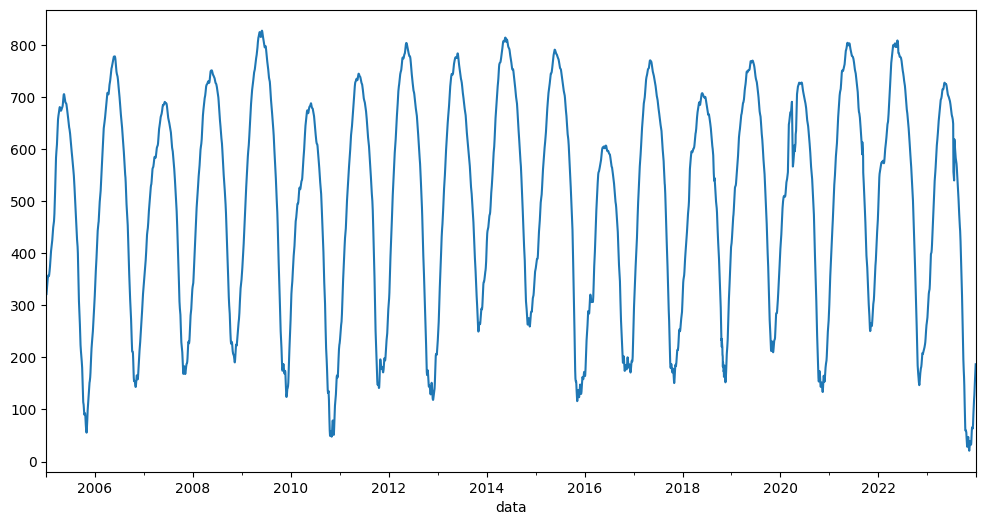

In [12]:
decompose.trend.plot(figsize=(12,6));

<Axes: >

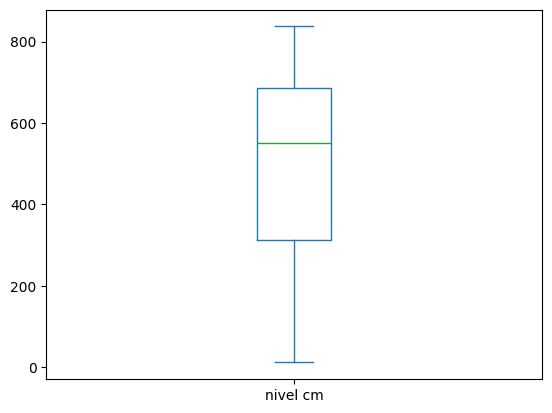

In [13]:
df['nivel cm'].plot.box()


# Time Series Modeling

## Stationary Test

<Axes: xlabel='data'>

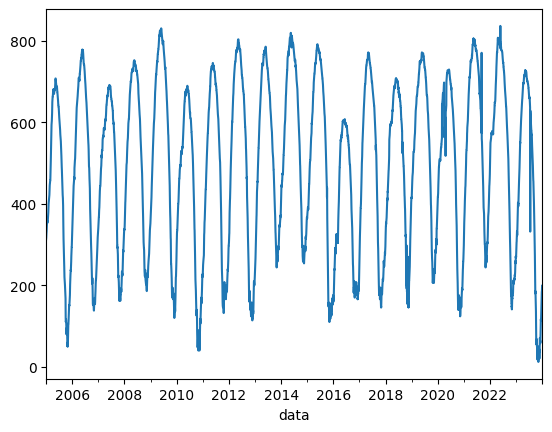

In [14]:
df['nivel cm'].plot()

In [15]:
!pip install arch

In [16]:
from arch.unitroot import ADF, KPSS, PhillipsPerron


In [17]:
PhillipsPerron(df['nivel cm'])


Test Statistic,-4.364
P-value,0.000
Lags,35


In [18]:
ADF(df['nivel cm'])


Test Statistic,-11.427
P-value,0.000
Lags,33


**1st diff**


In [19]:
df_diff = df['nivel cm'].diff(periods=1).iloc[1:]


In [20]:
df_diff.head()


,nivel cm
data,
2005-01-02,2.0
2005-01-03,2.0
2005-01-04,6.0
2005-01-05,2.0
2005-01-06,3.0


In [21]:
PhillipsPerron(df_diff)


Test Statistic,-111.023
P-value,0.000
Lags,35


In [22]:
df_diff.head()


,nivel cm
data,
2005-01-02,2.0
2005-01-03,2.0
2005-01-04,6.0
2005-01-05,2.0
2005-01-06,3.0


In [23]:
ADF(df_diff)


Test Statistic,-6.881
P-value,0.000
Lags,35


<Axes: xlabel='data'>

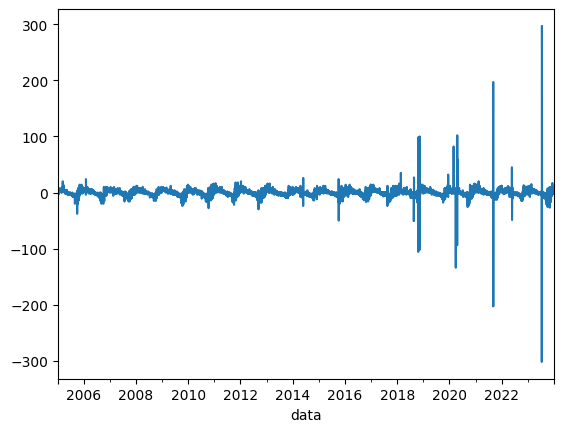

In [24]:
#plt.figure(figsize=(20, 5))
df_diff.plot()


## ACF and PACF plot




* Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

* Partial Autocorrelation is a conditional correlation.



In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


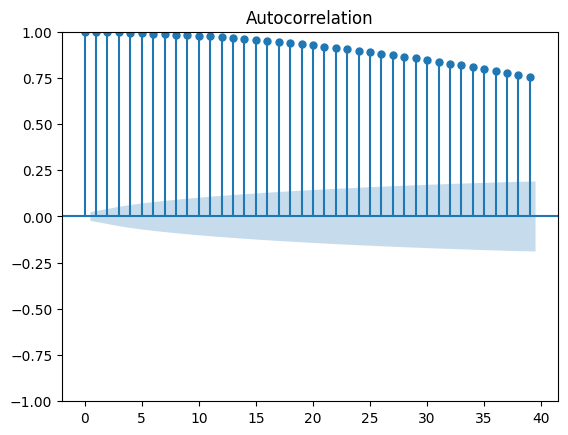

In [26]:
plot_acf(df['nivel cm']); # q order


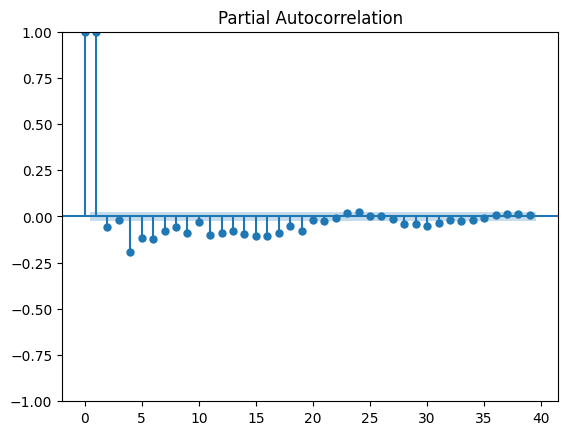

In [27]:
plot_pacf(df['nivel cm']); # p order


# AUTO ARIMA

In [28]:
!pip install pmdarima

In [29]:
from pmdarima import auto_arima


In [30]:
stepwise_fit = auto_arima(df['nivel cm'], start_p=0,start_q=0, max_p=6,max_q=3, m=12, seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107126.475, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=2.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=50467.664, Time=1.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=49676.992, Time=12.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=50430.904, Time=4.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=49557.794, Time=9.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=50469.394, Time=2.63 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=50384.216, Time=10.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=49376.906, Time=5.54 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=50167.717, Time=1.36 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=49351.862, Time=6.12 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=50384.840, Time=7.49 sec
 ARIMA(4,0,2)(0,0,0)[0]           

In [31]:
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6939
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -24609.418
Date:                Sun, 02 Feb 2025   AIC                          49234.837
Time:                        20:25:39   BIC                          49289.596
Sample:                    01-01-2005   HQIC                         49253.714
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2431      0.018     13.343      0.000       0.207       0.279
ar.L1          1.7492      0.021     85.181      0.000       1.709       1.789
ar.L2         -0.5006      0.041    -12.182      0.000      -0.581      -0.420
ar.L3         -0.2491      0.021    -12.095      0.000      -0.289      -0.209
ma.L1         -0.8383      0.021    -40.620      0.000      -0.879      -0.798
ma.L2         -0.3185      0.023    -14.075      0.000      -0.363      -0.274
ma.L3          0.2117      0.003     69.625      0.000       0.206       0.218
sigma2        70.5312      0.111    634.864      0.000      70.313      70.749
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):          64151072.50
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              10.49   Skew:                            -2.03
Prob(H) (two-sided):                  0.00   Kurtosis:                       474.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6939 entries, 2005-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   nivel cm  6939 non-null   int64
dtypes: int64(1)
memory usage: 108.4 KB


In [35]:
train = df.iloc[:5551]
test = df.iloc[5551:]

In [36]:
train.tail()


,nivel cm
data,
2020-03-09,654
2020-03-10,658
2020-03-11,664
2020-03-12,668
2020-03-13,670


In [37]:
test.head()


,nivel cm
data,
2020-03-14,672
2020-03-15,672
2020-03-16,670
2020-03-17,670
2020-03-18,670


## ARIMA Model for nivel

ARIMA (p, d, q)

p, d, q = 3, 0, 3 --> foi calculado em 'stepwise_fit'

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
model_nivel = ARIMA(train['nivel cm'], order=(3,0,3))

result_nivel = model_nivel.fit()
result_nivel.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               nivel cm   No. Observations:                 5551
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -17417.807
Date:                Sun, 02 Feb 2025   AIC                          34851.615
Time:                        20:25:48   BIC                          34904.589
Sample:                    01-01-2005   HQIC                         34870.083
                         - 03-13-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        498.4963    102.714      4.853      0.000     297.181     699.812
ar.L1          1.4092      0.016     85.717      0.000       1.377       1.441
ar.L2         -0.0799      0.032     -2.463      0.014      -0.144      -0.016
ar.L3         -0.3301      0.018    -18.694      0.000      -0.365      -0.295
ma.L1         -0.3878      0.017    -22.615      0.000      -0.421      -0.354
ma.L2         -0.1286      0.017     -7.424      0.000      -0.163      -0.095
ma.L3          0.2958      0.004     74.965      0.000       0.288       0.303
sigma2        31.0698      0.142    218.560      0.000      30.791      31.348
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):           4298008.39
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               4.75   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                       139.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
prediction_nivel = result_nivel.predict(start=len(train),end=len(train)+len(test)-1, typ='levels').rename('ARIMA(3,0,3)-predictions')


In [41]:
prediction_nivel


,"ARIMA(3,0,3)-predictions"
2020-03-14,673.574639
2020-03-15,676.200110
2020-03-16,677.931643
2020-03-17,679.368956
2020-03-18,680.389448
...,...
2023-12-27,501.399956
2023-12-28,501.391176
2023-12-29,501.382422
2023-12-30,501.373694


In [42]:
test['ARIMA_predistion']= prediction_nivel


<Axes: title={'center': 'True prediction_ARIMA'}, xlabel='data'>

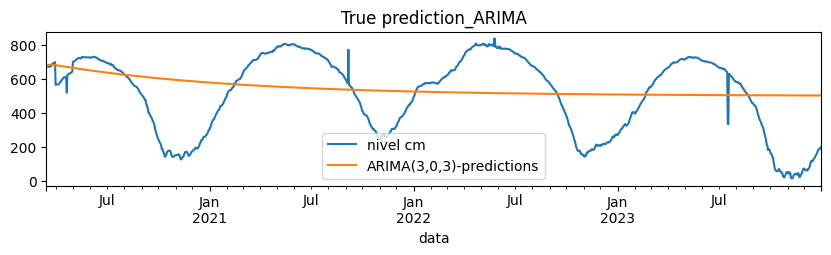

In [43]:
test['nivel cm'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction_nivel.plot(legend=True)

## Error Estimation

In [44]:
from statsmodels.tools.eval_measures import rmse, mse


In [45]:
rmse(test['nivel cm'],prediction_nivel)


225.41285234135339

In [46]:
mse(test['nivel cm'],prediction_nivel)


50810.95400066478

In [47]:
test['nivel cm'].mean()


514.1693083573487

In [48]:
prediction_nivel.mean()


543.3551681979926

## Final Model Forecasting


In [49]:
FinalModel_nivel = ARIMA(df['nivel cm'], order=(3,0,3))

FinalResult_nivel = FinalModel_nivel.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
FinalResult_nivel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               nivel cm   No. Observations:                 6939
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -24595.475
Date:                Sun, 02 Feb 2025   AIC                          49206.950
Time:                        20:26:28   BIC                          49261.709
Sample:                    01-01-2005   HQIC                         49225.827
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        501.6543     16.742     29.964      0.000     468.841     534.467
ar.L1          1.6539      0.021     76.985      0.000       1.612       1.696
ar.L2         -0.3132      0.043     -7.280      0.000      -0.398      -0.229
ar.L3         -0.3411      0.022    -15.792      0.000      -0.383      -0.299
ma.L1         -0.7383      0.022    -34.233      0.000      -0.781      -0.696
ma.L2         -0.4153      0.024    -17.647      0.000      -0.461      -0.369
ma.L3          0.2012      0.003     68.212      0.000       0.195       0.207
sigma2        70.1133      0.109    641.216      0.000      69.899      70.328
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):          66413189.21
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              10.80   Skew:                            -2.03
Prob(H) (two-sided):                  0.00   Kurtosis:                       482.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
forecast_nivel = FinalResult_nivel.predict(start=len(df),end=len(df)+47 , typ='levels').rename('ARIMA(3,0,3)-forecast')


<Axes: xlabel='data'>

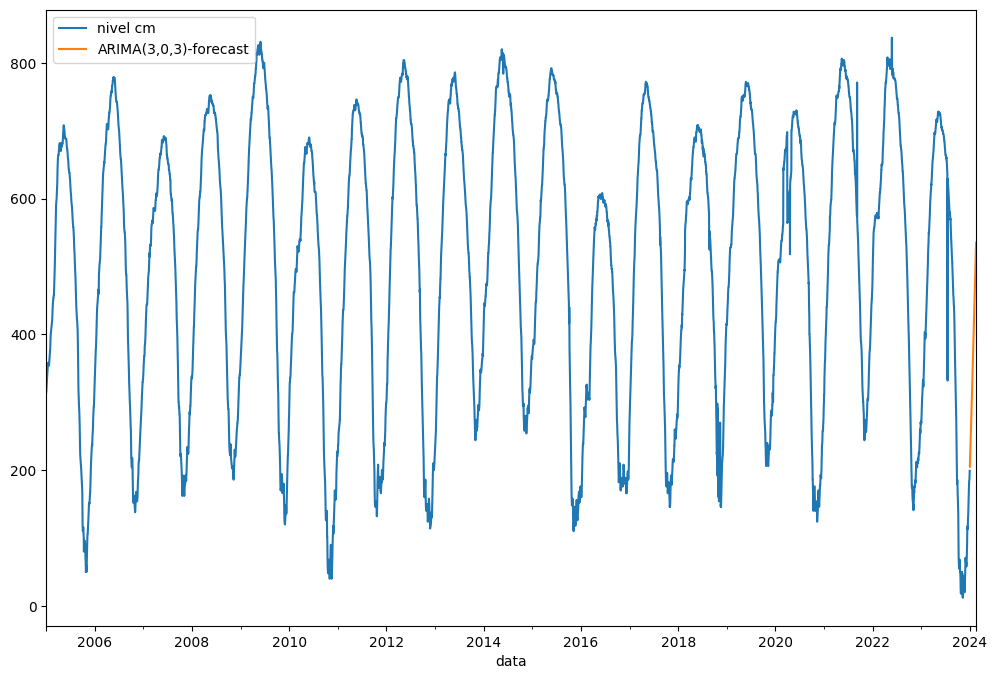

In [52]:
df['nivel cm'].plot(figsize=(12,8),legend=True)
forecast_nivel.plot(legend=True)

In [53]:
print(forecast_nivel)


2024-01-01    204.964993
2024-01-02    211.960717
2024-01-03    217.930425
2024-01-04    224.344538
2024-01-05    230.696699
2024-01-06    237.157209
2024-01-07    243.664722
2024-01-08    250.237173
2024-01-09    256.865341
2024-01-10    263.549288
2024-01-11    270.285885
2024-01-12    277.073082
2024-01-13    283.908451
2024-01-14    290.789680
2024-01-15    297.714411
2024-01-16    304.680292
2024-01-17    311.684962
2024-01-18    318.726059
2024-01-19    325.801215
2024-01-20    332.908059
2024-01-21    340.044220
2024-01-22    347.207325
2024-01-23    354.395001
2024-01-24    361.604873
2024-01-25    368.834570
2024-01-26    376.081722
2024-01-27    383.343960
2024-01-28    390.618921
2024-01-29    397.904244
2024-01-30    405.197573
2024-01-31    412.496560
2024-02-01    419.798859
2024-02-02    427.102134
2024-02-03    434.404057
2024-02-04    441.702307
2024-02-05    448.994572
2024-02-06    456.278551
2024-02-07    463.551952
2024-02-08    470.812497
2024-02-09    478.057917


## Kolmogorov-Smirnov test for goodness of fit. Normality of residuals

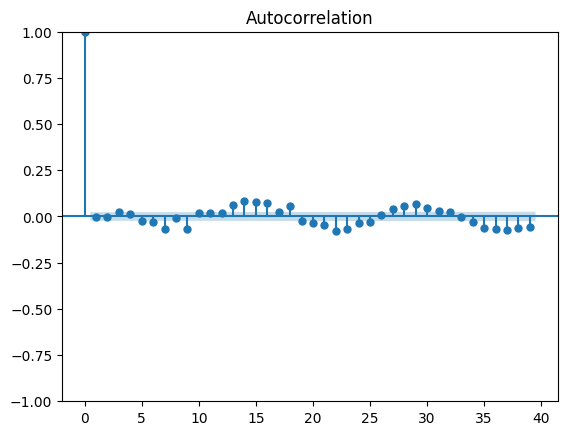

In [54]:
plot_acf(FinalResult_nivel.resid);


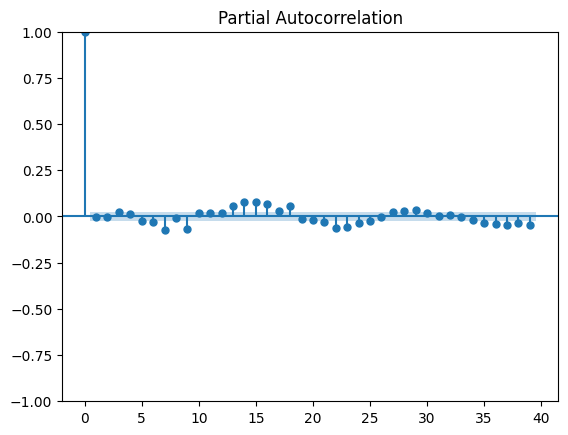

In [55]:
plot_pacf(FinalResult_nivel.resid);


<Axes: xlabel='data'>

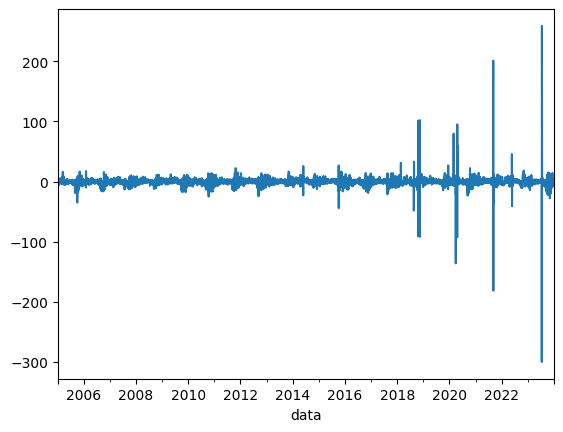

In [56]:
FinalResult_nivel.resid.plot()

<Axes: ylabel='Frequency'>

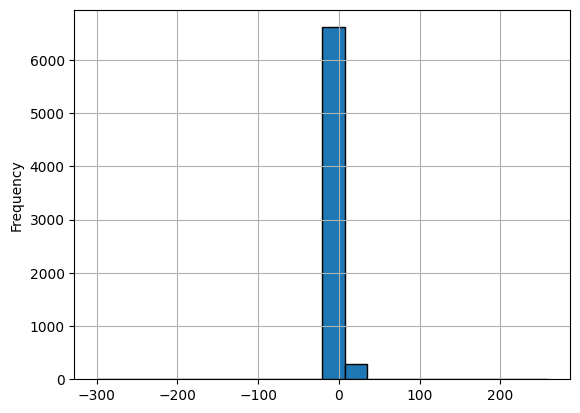

In [57]:
FinalResult_nivel.resid.plot.hist(bins=20,grid=True,edgecolor='k')

**Normality test**

In [58]:
stats.kstest(FinalResult_nivel.resid.values, 'norm') # Kolmogorov-Smirnov test


KstestResult(statistic=0.2521670710582723, pvalue=0.0, statistic_location=1.5207528915984767, statistic_sign=-1)

In [59]:
stats.shapiro(FinalResult_nivel.resid)      # Shapiro wilk test


ShapiroResult(statistic=0.3835518529030597, pvalue=4.308364221855652e-93)

In [60]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot


In [61]:
df.index = pd.to_datetime(df.index)  # Converte o índice para datetime
df = df.asfreq('MS')


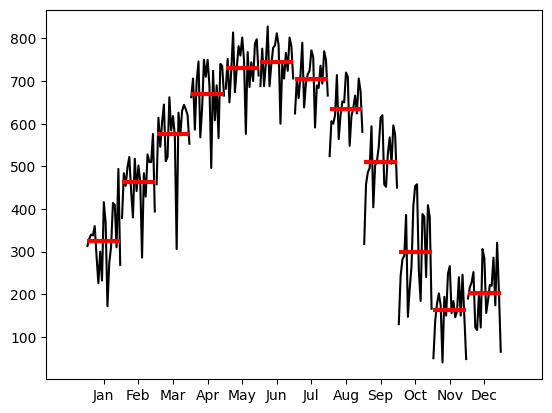

In [62]:
month_plot(df['nivel cm']);


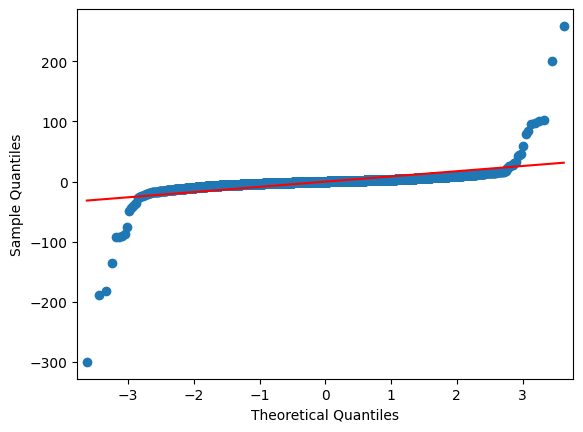

In [63]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(FinalResult_nivel.resid, line='s');

In [64]:
sm.stats.diagnostic.acorr_ljungbox(FinalResult_nivel.resid, lags=[30],return_df=True)


,lb_stat,lb_pvalue
30,467.472344,5.471728e-80


## ARIMA-GARCH


In [65]:
sm.stats.diagnostic.het_arch(FinalResult_nivel.resid, nlags=20)


(1223.6168033676445,
 6.625039674176043e-247,
 74.09956817849262,
 1.0187321053650631e-272)

In [66]:
resid= FinalResult_nivel.resid


In [67]:
resid

,0
data,
2005-01-01,-188.654255
2005-01-02,1.825378
2005-01-03,1.656236
2005-01-04,5.598356
2005-01-05,0.902739
...,...
2023-12-27,-3.287345
2023-12-28,-4.213419
2023-12-29,-6.301725


In [68]:
resid_train = resid.iloc[:5551]
resid_test = resid.iloc[5551:]

In [69]:
!pip install arch

In [70]:
from arch import arch_model


In [71]:
model_garch = arch_model(resid_train , mean='constant', vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 18685.248514883475
Iteration:     10,   Func. Count:     59,   Neg. LLF: 15709.251208179685
Iteration:     15,   Func. Count:     83,   Neg. LLF: 15709.229368053406
Optimization terminated successfully    (Exit mode 0)
            Current function value: 15709.229368052305
            Iterations: 15
            Function evaluations: 83
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -15709.2
Distribution:                  Normal   AIC:                           31426.5
Method:            Maximum Likelihood   BIC:                           31452.9
                                        No. Observations:                 5551
Date:                Sun, Feb 02 2025   Df Residuals:                     5550
Time:                        20:26:34   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0803  8.102e-02      0.991      0.322 [-7.854e-02,  0.239]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.3618      1.100      2.147  3.180e-02 [  0.206,  4.518]
alpha[1]       0.2574  7.499e-02      3.432  5.993e-04 [  0.110,  0.404]
beta[1]        0.6678  7.170e-02      9.314  1.232e-20 [  0.527,  0.808]
========================================================================

Covariance estimator: robust
"""

In [72]:
rolling_predictions = []
test_size = 12

for i in range(test_size):
    train = resid[:-(test_size-i)]
    model = arch_model(train, mean='constant', vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [73]:
rolling_predictions = pd.Series(rolling_predictions, index=resid.index[-12:])


In [74]:
rolling_predictions


,0
data,
2023-12-20,6.825247
2023-12-21,6.686470
2023-12-22,6.672578
2023-12-23,6.558134
2023-12-24,6.473800
2023-12-25,6.409084
2023-12-26,6.427839
2023-12-27,6.438550
2023-12-28,6.455687


NameError: name 'test_resid' is not defined

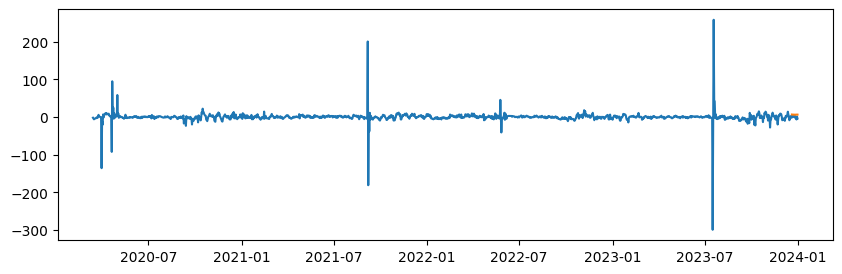

In [75]:
plt.figure(figsize=(10,3))
true, = plt.plot(resid_test)
preds, = plt.plot(rolling_predictions)
pred, = plt.plot(test_resid['prediction'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility_ARIMA-GARCH','Prediction Volatility_ARIMA-LSTM'], fontsize=7)

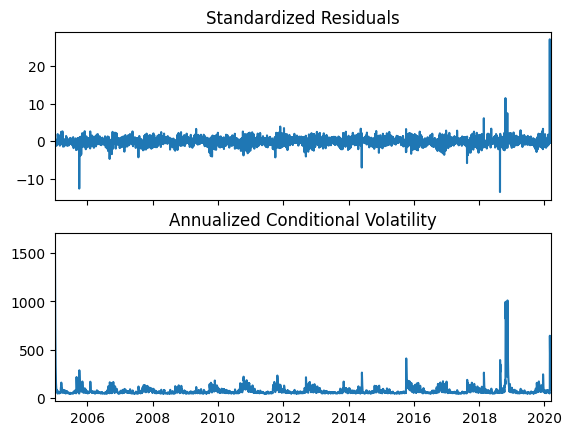

In [76]:
results_garch.plot(annualize='D');


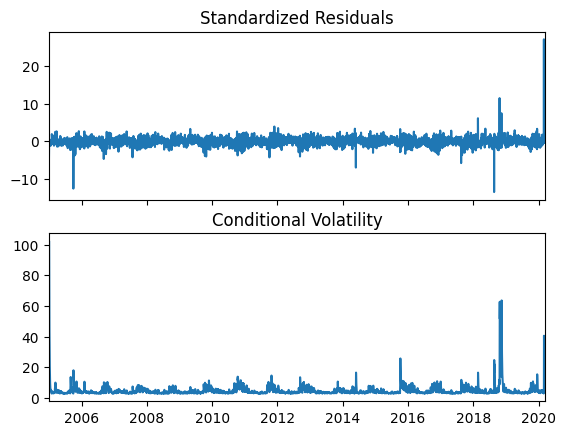

In [77]:
results_garch.plot();


## Normality check

<Axes: ylabel='Frequency'>

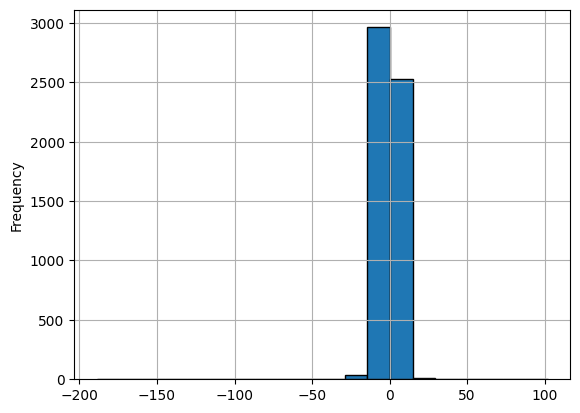

In [78]:
results_garch.resid.plot.hist(bins=20,grid=True,edgecolor='k')


In [79]:
stats.kstest(results_garch.std_resid.values, 'norm') # Kolmogorov-Smirnov test


KstestResult(statistic=0.0628230110361816, pvalue=1.7280143608420417e-19, statistic_location=0.7489701948598594, statistic_sign=1)

In [80]:
stats.shapiro(results_garch.std_resid)      # Shapiro wilk test


ShapiroResult(statistic=0.8287577501829045, pvalue=8.575150447686625e-61)

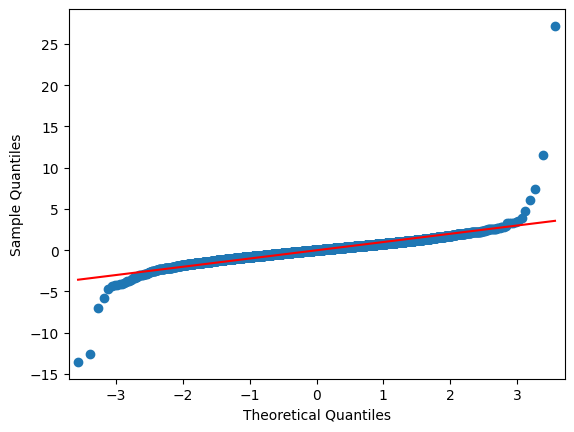

In [81]:
sm.qqplot(results_garch.std_resid, line='s');

In [82]:
sm.stats.diagnostic.acorr_ljungbox(results_garch.resid, lags=[15], return_df=True)


,lb_stat,lb_pvalue
15,994.895913,1.673112e-202


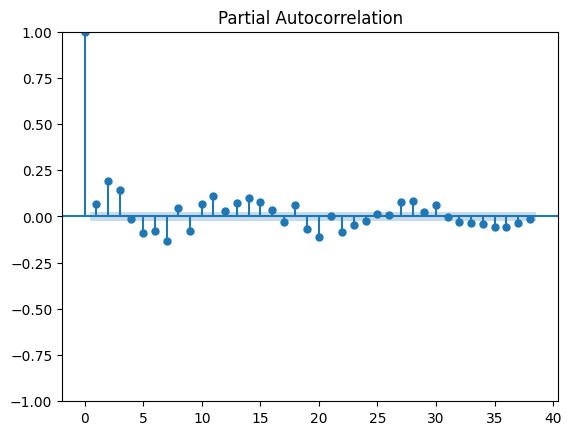

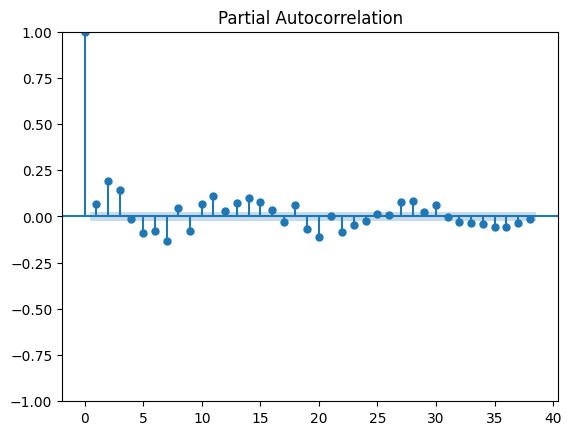

In [83]:
plot_pacf(results_garch.resid)


<Axes: xlabel='data'>

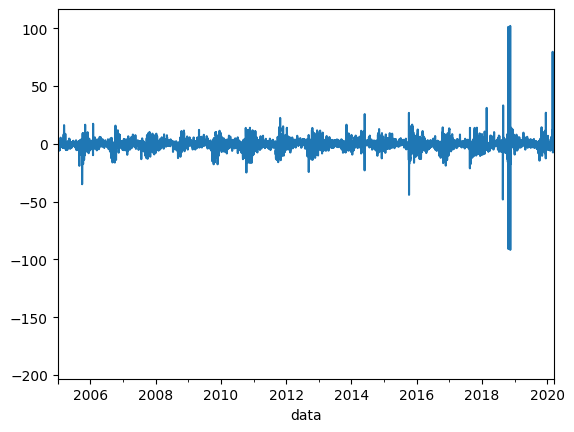

In [84]:
results_garch.resid.plot()


In [85]:
test

,nivel cm,ARIMA_predistion
data,,
2020-03-14,672,673.574639
2020-03-15,672,676.200110
2020-03-16,670,677.931643
2020-03-17,670,679.368956
2020-03-18,670,680.389448
...,...,...
2023-12-27,184,501.399956
2023-12-28,186,501.391176
2023-12-29,187,501.382422


from matplotlib import pyplot as plt
test['nivel cm'].plot(kind='hist', bins=20, title='nivel cm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test['ARIMA_predistion'].plot(kind='hist', bins=20, title='ARIMA_predistion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test.plot(kind='scatter', x='nivel cm', y='ARIMA_predistion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test['nivel cm'].plot(kind='line', figsize=(8, 4), title='nivel cm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test['ARIMA_predistion'].plot(kind='line', figsize=(8, 4), title='ARIMA_predistion')
plt.gca().spines[['top', 'right']].set_visible(False)

In [86]:
prediction_nivel

,"ARIMA(3,0,3)-predictions"
2020-03-14,673.574639
2020-03-15,676.200110
2020-03-16,677.931643
2020-03-17,679.368956
2020-03-18,680.389448
...,...
2023-12-27,501.399956
2023-12-28,501.391176
2023-12-29,501.382422
2023-12-30,501.373694


In [87]:
predicted_mu = result_nivel.forecast()[0]

In [88]:
predicted_mu


673.5746394066034

In [89]:
garch_forecast = results_garch.forecast(horizon=1)


In [90]:
predicted_et = garch_forecast.mean['h.1'].iloc[-1]


In [91]:
predicted_et

0.08026177208905394

In [92]:
prediction = predicted_mu+predicted_et


In [93]:
prediction_GARCH = prediction_nivel+rolling_predictions


In [94]:
prediction_GARCH


,0
2020-03-14,NaN
2020-03-15,NaN
2020-03-16,NaN
2020-03-17,NaN
2020-03-18,NaN
...,...
2023-12-27,507.838506
2023-12-28,507.846863
2023-12-29,507.899115
2023-12-30,508.082934


In [95]:
rmse(test['nivel cm'],prediction_GARCH)


nan

In [96]:
prediction_GARCH.shape


(1388,)

In [97]:
test['nivel cm'].shape


(1388,)

In [98]:
prediction_nivel.shape


(1388,)

In [99]:
mse(test['nivel cm'],prediction_GARCH)


nan

In [100]:
!pip install diebold_mariano_test

In [101]:
from diebold_mariano_test import cul_d_t,MAE,MSE,cul_DM,cul_P


In [102]:
dm = cul_d_t(MAE,test['nivel cm'],prediction_nivel,prediction_GARCH)


In [103]:
cul_DM(dm)


nan

In [104]:
cul_P(dm)


nan

In [105]:
MAE(3,test['nivel cm'],prediction_nivel)


7.931642912331654

In [106]:
dm1=cul_d_t(MAE,test['nivel cm'],prediction_GARCH,prediction_nivel)


In [107]:
cul_DM(dm1)


nan

In [108]:

test['GARCH_prediction']= prediction_GARCH


In [109]:
test['GARCH_prediction']

,GARCH_prediction
data,
2020-03-14,NaN
2020-03-15,NaN
2020-03-16,NaN
2020-03-17,NaN
2020-03-18,NaN
...,...
2023-12-27,507.838506
2023-12-28,507.846863
2023-12-29,507.899115


## ARIMA-LSTM




**Lag estimation**

In [110]:
from statsmodels.tsa.stattools import acf
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from pandas import DataFrame

In [111]:
acf(FinalResult_nivel.resid**2,nlags=12,qstat=True)


(array([ 1.00000000e+00,  1.08087503e-01,  3.53466705e-01,  2.00248294e-02,
         1.18138600e-02, -5.64532338e-04, -2.90942870e-04,  2.33059843e-03,
         5.62120516e-03,  6.83123480e-03,  1.47451637e-02,  1.43956249e-02,
         3.52138711e-03]),
 array([ 81.10275501, 948.55237294, 951.33687469, 952.30616998,
        952.30838365, 952.3089717 , 952.34671113, 952.56628563,
        952.89061339, 954.40190254, 955.8425977 , 955.92881636]),
 array([2.14281031e-019, 1.05796017e-206, 6.47717252e-206, 7.72681267e-205,
        1.26827837e-203, 1.84087456e-202, 2.37496429e-201, 2.57657042e-200,
        2.47189019e-199, 1.23737698e-198, 6.07804630e-198, 5.55966925e-197]))

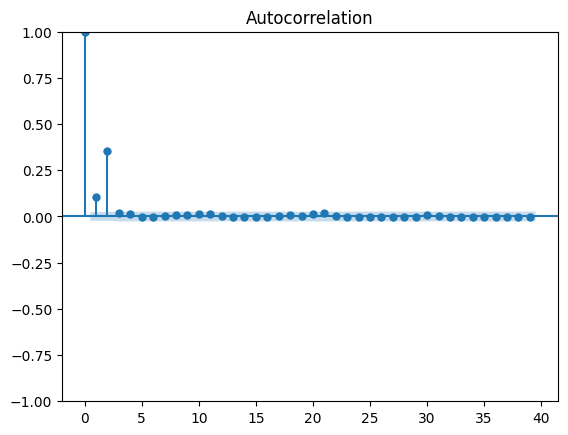

In [112]:
plot_acf(FinalResult_nivel.resid**2);


In [113]:
df['resid'] = FinalResult_nivel.resid**2


In [114]:
df

,nivel cm,resid
data,,
2005-01-01,313,35590.427902
2005-02-01,379,0.640326
2005-03-01,458,9.836570
2005-04-01,662,7.086734
2005-05-01,682,2.058528
...,...,...
2023-08-01,581,2.772011
2023-09-01,450,1.819482
2023-10-01,166,48.246839


In [115]:
mylist= ['resid']

df1 = df[mylist][1:]
df1.head()

,resid
data,
2005-02-01,0.640326
2005-03-01,9.836570
2005-04-01,7.086734
2005-05-01,2.058528
2005-06-01,1.580462


In [116]:
dataframe = DataFrame()
for i in range(9,0,-1):
    dataframe['t-'+str(i)] = df1.shift(i).values[:,0]
dataframe['t'] = df1.values[:,0]
print(dataframe.head(10))
dataframe = dataframe[10:]

        t-9       t-8       t-7       t-6       t-5       t-4        t-3  \
0       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN   0.640326   
4       NaN       NaN       NaN       NaN       NaN  0.640326   9.836570   
5       NaN       NaN       NaN       NaN  0.640326  9.836570   7.086734   
6       NaN       NaN       NaN  0.640326  9.836570  7.086734   2.058528   
7       NaN       NaN  0.640326  9.836570  7.086734  2.058528   1.580462   
8       NaN  0.640326  9.836570  7.086734  2.058528  1.580462   2.460959   
9  0.640326  9.836570  7.086734  2.058528  1.580462  2.460959  14.264731   

          t-2          t-1            t  
0         NaN          NaN     0.640326  
1         NaN     0.640326     9.836570  
2    0.640326     9.836570     7.0867

In [117]:
dataframe.to_csv('lags_12months_features.csv', index=False)


In [118]:
dataframe = pd.read_csv('lags_12months_features.csv', header=0)
array = dataframe.values

In [119]:
X = array[:,0:-1]
y = array[:,-1]

In [120]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)

RandomForestRegressor(random_state=1)

In [121]:
print(model.feature_importances_)

[0.01614324 0.02093588 0.20933742 0.01372038 0.02959925 0.15284493
 0.02576077 0.38027233 0.15138581]


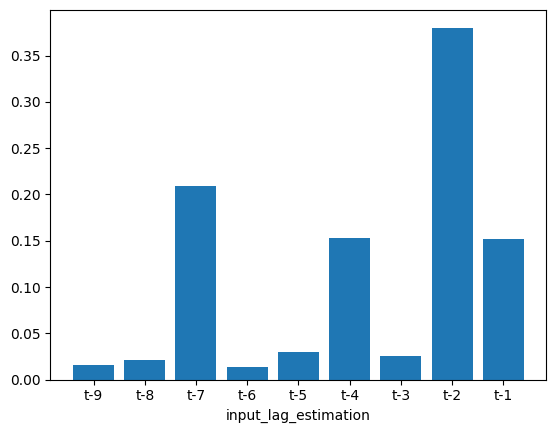

In [122]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.xlabel('input_lag_estimation')
pyplot.show()

In [123]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2005-02-01 to 2023-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   resid   227 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


# nao sei

In [124]:
# preciso verificar esses numeros. coloquei 181 pq era 80% de 227
# nao sei se faz sentido
train_resid = df1.iloc[:181]
test_resid = df1.iloc[181:]

In [125]:
from sklearn.preprocessing import MinMaxScaler


In [126]:
scaler = MinMaxScaler()
scaler.fit(train_resid)

MinMaxScaler()

In [127]:
scaled_train = scaler.transform(train_resid)
scaled_test = scaler.transform(test_resid)

In [128]:
!pip install keras tensorflow

In [130]:
!pip install keras tensorflow --upgrade


In [132]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [133]:
# Define the generator
n_input = 3 # how many data will estimate the next time stand value.
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [134]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import plot_model

In [135]:
model = Sequential()

model.add(LSTM(66, activation='relu', input_shape =(n_input,n_features)))    #relu = rectified linear unit
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [136]:
  model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 66)                  │          17,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              67 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,019 (70.39 KB)

 Trainable params: 18,019 (70.39 KB)

 Non-trainable params: 0 (0.00 B)

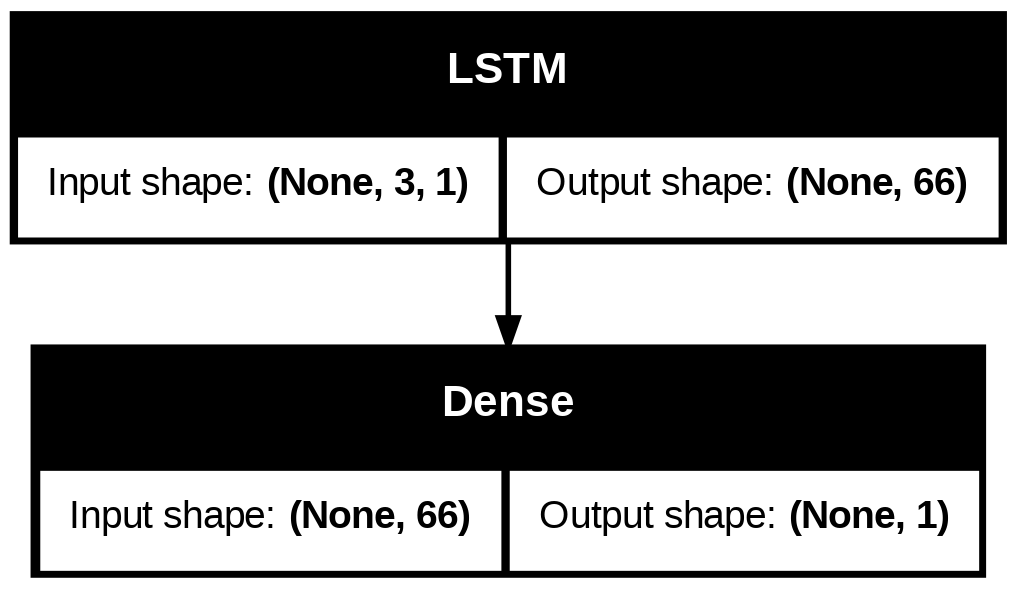

In [137]:
plot_model(model,show_shapes=True)

In [138]:
model.fit(train_generator, epochs=25)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0023
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011    
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

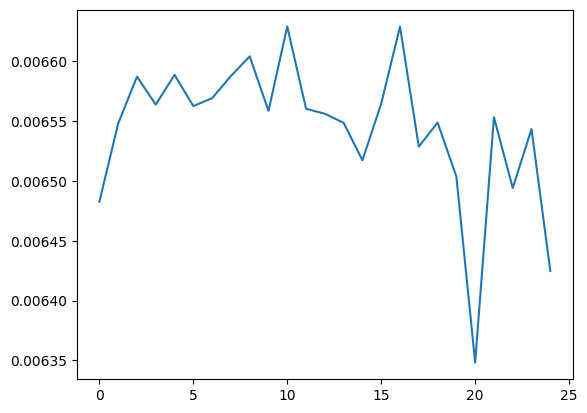

In [139]:
myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss)

In [140]:
# Holding my prediction
test_prediction = []

# Last n_input point from the train set
first_eval_batch= scaled_train[-n_input:]

# Reshape this to the RNN format. same as TimeSeriesGenarator
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far will we forecast?

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_prediction.append(current_pred)

    current_batch= np.append(current_batch[:,1:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━

In [141]:
test_prediction

[array([0.02288335], dtype=float32),
 array([0.02414504], dtype=float32),
 array([0.02430613], dtype=float32),
 array([0.02429983], dtype=float32),
 array([0.02429437], dtype=float32),
 array([0.02429286], dtype=float32),
 array([0.02429265], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 array([0.02429263], dtype=float32),
 

In [142]:
true_prediction = scaler.inverse_transform(test_prediction)


In [143]:
true_prediction


array([[27.78745519],
       [29.31951975],
       [29.51513412],
       ...,
       [29.49874283],
       [29.49874283],
       [29.49874283]])

In [144]:
test_resid['resid']


,resid
data,
2020-03-01,6359.847325
2020-04-01,126.073690
2020-05-01,3443.565602
2020-06-01,0.017915
2020-07-01,3.847414
2020-08-01,2.081828
2020-09-01,0.048251
2020-10-01,15.652982
2020-11-01,25.436952


In [147]:
test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'] = true_prediction[:len(test_resid)]


In [148]:
test_resid['Prediction Volatility ARIMA-GARCH']= rolling_predictions
test_resid['true Volatility']= resid_test
test_resid.to_csv('Gram volatility.csv')

In [150]:
test['ARIMA-LSTM_Pred']= test['ARIMA_predistion']+test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)']


In [151]:
test

,nivel cm,ARIMA_predistion,GARCH_prediction,ARIMA-LSTM_Pred
data,,,,
2020-03-14,672,673.574639,NaN,NaN
2020-03-15,672,676.200110,NaN,NaN
2020-03-16,670,677.931643,NaN,NaN
2020-03-17,670,679.368956,NaN,NaN
2020-03-18,670,680.389448,NaN,NaN
...,...,...,...,...
2023-12-27,184,501.399956,507.838506,NaN
2023-12-28,186,501.391176,507.846863,NaN
2023-12-29,187,501.382422,507.899115,NaN


<Axes: xlabel='data'>

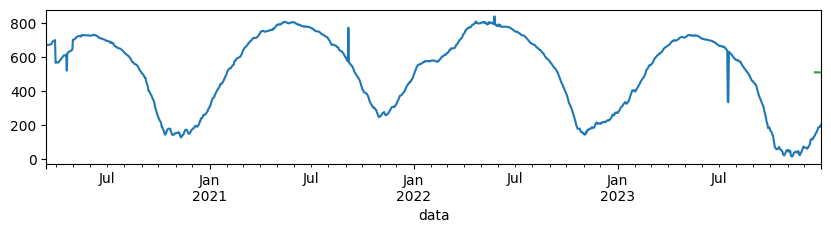

In [155]:
test['nivel cm'].plot(figsize=(10,2))
test['ARIMA-LSTM_Pred'].plot()
test['GARCH_prediction'].plot()

In [157]:
rmse(test['nivel cm'],test['ARIMA-LSTM_Pred'])


nan

In [158]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [159]:
mean_absolute_percentage_error(test['nivel cm'],test['ARIMA-LSTM_Pred'])


nan

In [160]:
test.to_csv('nivelresult with ARIMA-LSTM Random forecst.csv')